In [17]:
# I import useful libraries (with functions) so I can visualize my data
# I use Pandas because this dataset has word/string column titles and I like the readability features of commands and finish visual products that Pandas offers

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#I want to be able to easily scroll through this notebook so I limit the length of the appearance of my dataframes 
from pandas import set_option
set_option('display.max_rows', 10)

In [18]:
choir_division=pd.read_csv('/Users/shubbymartz-oberlander/Desktop/assignment_6/choir_division_0.csv', sep=',')
choir_division.head(n=5)

,Number,"Date Time, GMT-05:00",Temp,"RH, %"
0,1,02/18/10 02:00:00 PM,20.138,29.03
1,2,02/18/10 02:30:00 PM,20.138,28.84
2,3,02/18/10 03:00:00 PM,20.234,28.60
3,4,02/18/10 03:30:00 PM,20.424,28.44
4,5,02/18/10 04:00:00 PM,20.424,28.23


In [76]:
#Rename the column names so they're cleaner

choir_division.columns=['Number', 'Date_Time', 'Temp', 'RH']
choir_division

,Number,Date_Time,Temp,RH
0,1,02/18/10 02:00:00 PM,20.138,29.03
1,2,02/18/10 02:30:00 PM,20.138,28.84
2,3,02/18/10 03:00:00 PM,20.234,28.60
3,4,02/18/10 03:30:00 PM,20.424,28.44
4,5,02/18/10 04:00:00 PM,20.424,28.23
...,...,...,...,...
575,576,2003-02-10 13:30,19.758,33.31
576,577,2003-02-10 14:00,19.948,33.14
577,578,2003-02-10 14:30,20.329,32.71
578,579,2003-02-10 14:57,NaN,NaN


# Creating Figures

In [122]:
# Import font options

from fontTools.ttLib import ttfont

#It turns out I would have to download more software to have this font libary

ImportError: No module named 'fontTools'

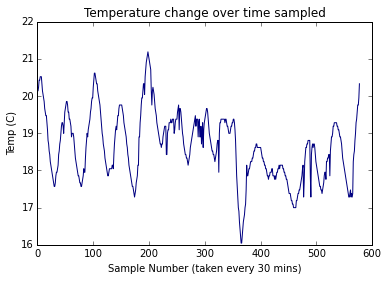

In [127]:
#Plot of Temp vs. Sample number

plt.plot(choir_division.Temp, marker='', color='navy', linestyle='-')

plt.title('Temperature change over time sampled')

plt.ylabel('Temp (C)')
plt.xlabel('Sample Number (taken every 30 mins)')

In [130]:
grouped_choir_division = choir_division.groupby('Date_Time')
type(grouped_choir_division)
grouped_choir_division.head(n=20)

,Number,Date_Time,Temp,RH
0,1,02/18/10 02:00:00 PM,20.138,29.03
1,2,02/18/10 02:30:00 PM,20.138,28.84
2,3,02/18/10 03:00:00 PM,20.234,28.60
3,4,02/18/10 03:30:00 PM,20.424,28.44
4,5,02/18/10 04:00:00 PM,20.424,28.23
...,...,...,...,...
575,576,2003-02-10 13:30,19.758,33.31
576,577,2003-02-10 14:00,19.948,33.14
577,578,2003-02-10 14:30,20.329,32.71
578,579,2003-02-10 14:57,NaN,NaN


<function matplotlib.pyplot.show>

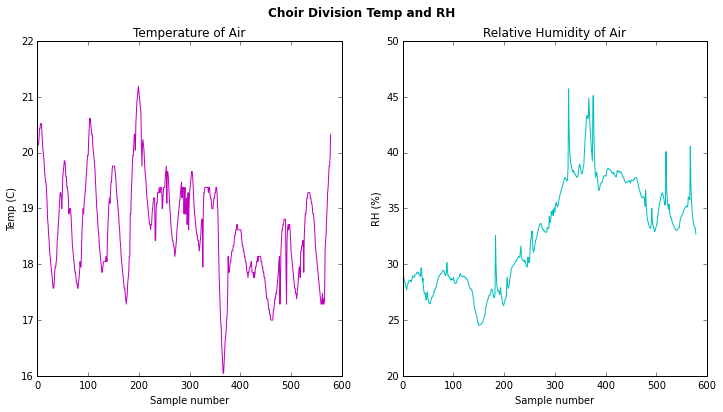

In [132]:
#change figure size -- MUST BE AT THE START
plt.figure(figsize=(12,6)) #(x-axis length, y-axis length)

#add title and make it larger and bold
plt.suptitle('Choir Division Temp and RH',fontsize='large', fontweight='bold') 

# add data to the plot
plt.plot(choir_division.Temp, marker='*', color='orange', linestyle='--') #case sensitive

#modify axis limits of graph
plt.xlim(0,1000)
plt.ylim(0, 1000)

#define subplot1
plt.subplot(1,2,1) #one row, two columns, first figure
plt.plot(choir_division.Number, choir_division.Temp, color='m') #y-axis listed first

plt.title('Temperature of Air')

# add axis labels
plt.ylabel('Temp (C)')
plt.xlabel('Sample number')

#define subplot2
plt.subplot(1,2,2) #one row, two columns, second figure
plt.plot(choir_division.Number, choir_division.RH, color='c') 

plt.title('Relative Humidity of Air')

# add axis labels
plt.ylabel('RH (%)')
plt.xlabel('Sample number')

#show the figure panel
plt.show


(10, 50)

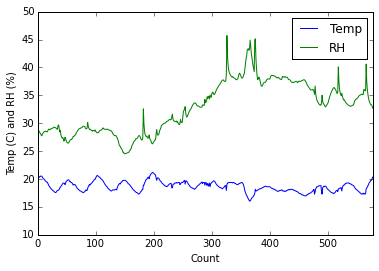

In [101]:
# To compare the change in Temp and relative humidity (RH) I plot the two graphs above on the same chart 

#Dictate size of plot. Command goes before creating the plot
plt.figure(figsize=(18,10))

#Create the plot
fig1 = choir_division[['Temp', 'RH']].plot()


#instructions about the figure must go after the command to create the figure
plt.xlabel('Count')
plt.ylabel('Temp (C) and RH (%)')

#Set the X and Y axis limits for the figure
fig1.set_xlim([0,577]) #577 is the number of data points collected
fig1.set_ylim([10, 50])
 

# Histogram figure

AttributeError: max must be larger than min in range parameter.

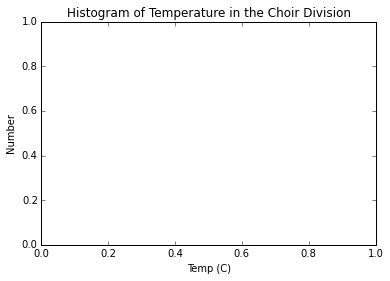

In [140]:
#Plot a histogram of temperature values

plt.title('Histogram of Temperature in the Choir Division')

plt.ylabel('Number')
plt.xlabel('Temp (C)')

plt.hist(choir_division.Temp)

I see that the histogram chart doesn't work. The error message tells me that there are highest or lowest occurences of reading (no repeating temp values). Histograms look to show the frequency of occurence of a value (of temp, or RH, for example), and therefore will have nothing to show if no values repeat. Perhaps there aren't more than one of the same temp reading in this dataset. 

It would be nice to see the mean and how much the temp readings deviate from this average.

# Plotting the mean and distribution of temperature values

Number    290.500000
Temp       18.657358
RH         32.814567
dtype: float64
Number    167.575853
Temp        0.912976
RH          4.599684
dtype: float64


ValueError: too many values to unpack (expected 2)

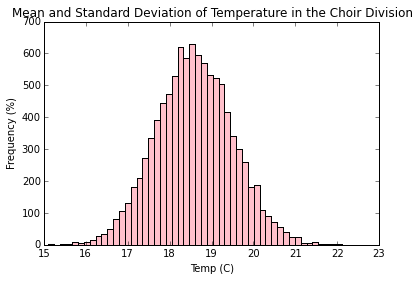

In [177]:
#Distrubution of temperature values as collected over time

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt 

#must start by calculating mean and st dev

mu = choir_division.mean()
print(mu)

st_dev =choir_division.std()
print(st_dev)

plt.xlabel('Temp (C)')
plt.ylabel('Frequency (%)')
plt.title('Mean and Standard Deviation of Temperature in the Choir Division')


mu, sigma = 18.6, 0.913 #mean and standard deviation of Temp
x = mu + sigma*np.random.randn(10000)

n, patches = plt.hist(x, 50, facecolor='pink')

plt.axis([14, 22, 0, 0.5]) #I dictated the min and max limits of the x and y axes of the plot

plt.show()

I get an error number, however I can see a the mean values for temp lies in a logical area of around 18-19 degrees Celsius. The frequency (y-axis) graph makes less sense since it seems to represent the number of samples, or data points, in this dataframe, whereas I want the frequency of occurence of the temp values around the mean.

# Standard Deviation Plot

In [145]:
#This generates a plot of the standard deviation of the data in the "Temp column"

df['STD'] = pd.rolling_std(df['Temp'], 25, min_periods=1)

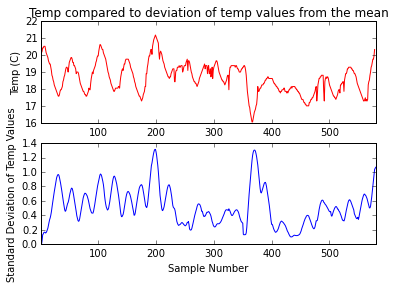

In [161]:
#This is the Temp plot
ax1 = plt.subplot(2, 1, 1)
df['Temp'].plot(color='r')

plt.ylabel('Temp (C)')
plt.title('Temp compared to deviation of temp values from the mean')

#This is the standard deviation of the Temp values plot
ax2 = plt.subplot(2, 1, 2, sharex = ax1) #shared x axis with ax1 which is the plot of temp vs. sample number
df['STD'].plot()

plt.xlabel('Sample Number')
plt.ylabel('Standard Deviation of Temp Values')

plt.show()


Notes on assignment:

I was finally able to upload and wrangle and format my data both in table and visual form (super satisfying!). I chose to first do a line graph of the temp and RH values because I wanted to see how they changed over time compared to one another. The histogram allowed me to see ____

I learned that the biggest challenge for my project will be "groupby" or organizing the data into relevant time chunks. Specifically, this dataset here is sampling from many days in this one location of the church (the choir division). To look at how temp or RH or CO2 changes over time, I need to be able to separate and then compare the days with each other--not present all the temp readings over time, which has little significance. 

The most meaningful plots for my project are looking at change in environmental characteristics (whether it's temp, RH or CO2) as they change over time as an audience fills the church.